In [115]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.dates import DateFormatter


# Modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel

In [116]:
def load_and_process_data(file_path):
    merge_csv = pd.read_csv(file_path, parse_dates=['DataDate'])
    merge_csv = merge_csv[(merge_csv['PM2_5'] != 0) & (merge_csv['PM2.5'] != 0) & (merge_csv['PM.10'] != 0)]
    merge_csv = merge_csv[['DataDate', 'PM2_5', 'PM2.5', 'RH', 'Temp']]
    return merge_csv

In [117]:
file_path = 'data/Teledyne_vs_sensor_data_ENE00950.csv'
merge_csv = load_and_process_data(file_path)
merge_csv


,DataDate,PM2_5,PM2.5,RH,Temp
0,2023-10-01 19:07:00,5.0,7.374148,100.50,26.61
1,2023-10-01 19:08:00,5.0,7.327665,100.50,26.63
2,2023-10-01 19:09:00,5.0,7.248282,100.50,26.66
3,2023-10-01 19:10:00,5.0,7.182676,100.50,26.65
4,2023-10-01 19:11:00,5.0,7.170102,100.50,26.64
...,...,...,...,...,...
49383,2023-11-16 13:45:00,2.0,8.077689,64.86,33.48
49384,2023-11-16 13:46:00,2.0,8.080121,64.28,33.71
49385,2023-11-16 13:47:00,2.0,8.092282,63.57,33.77
49386,2023-11-16 13:48:00,3.0,8.092282,64.45,33.74


In [118]:
file_path = 'data/Teledyne_vs_sensor_data_ENE00933.csv'
merge_csv_two = load_and_process_data(file_path)
merge_csv_two


,DataDate,PM2_5,PM2.5,RH,Temp
0,2023-10-01 17:54:00,4.0,7.276371,100.50,26.80
1,2023-10-01 17:55:00,5.0,7.128142,100.50,26.79
2,2023-10-01 17:56:00,5.0,7.118874,100.50,26.79
3,2023-10-01 17:57:00,4.0,7.077153,100.50,26.79
4,2023-10-01 17:58:00,4.0,7.055617,100.50,26.77
...,...,...,...,...,...
48368,2023-11-16 13:45:00,3.0,8.077689,64.86,33.48
48369,2023-11-16 13:46:00,4.0,8.080121,64.28,33.71
48370,2023-11-16 13:47:00,3.0,8.092282,63.57,33.77
48371,2023-11-16 13:48:00,3.0,8.092282,64.45,33.74


In [119]:
file_path = 'data/Teledyne_vs_sensor_data_ENE00960.csv'
merge_csv_three = load_and_process_data(file_path)
merge_csv_three


,DataDate,PM2_5,PM2.5,RH,Temp
0,2023-10-01 17:54:00,2.0,7.276371,100.50,26.80
1,2023-10-01 17:55:00,3.0,7.128142,100.50,26.79
2,2023-10-01 17:56:00,2.0,7.118874,100.50,26.79
3,2023-10-01 17:57:00,4.0,7.077153,100.50,26.79
4,2023-10-01 17:58:00,3.0,7.055617,100.50,26.77
...,...,...,...,...,...
43743,2023-11-16 13:45:00,1.0,8.077689,64.86,33.48
43744,2023-11-16 13:46:00,1.0,8.080121,64.28,33.71
43745,2023-11-16 13:47:00,1.0,8.092282,63.57,33.77
43746,2023-11-16 13:48:00,1.0,8.092282,64.45,33.74


In [120]:
train_set, test_set = train_test_split(merge_csv, test_size=0.2, random_state=485645)
train_set

,DataDate,PM2_5,PM2.5,RH,Temp
33707,2023-11-04 06:16:00,11.0,13.757560,100.5,26.12
10406,2023-10-14 12:07:00,15.0,21.331230,81.3,31.47
12761,2023-10-18 08:19:00,47.0,40.414680,100.5,27.09
29017,2023-10-31 14:52:00,6.0,10.355910,93.6,29.08
13450,2023-10-18 23:20:00,13.0,16.122100,100.5,26.15
...,...,...,...,...,...
1725,2023-10-03 22:45:00,8.0,9.574121,100.5,26.17
13800,2023-10-19 05:20:00,50.0,42.134600,100.5,25.44
39011,2023-11-08 08:40:00,9.0,10.808810,98.3,29.72
37309,2023-11-06 22:10:00,10.0,13.078460,100.5,28.48


In [121]:
train_set.shape

(39188, 5)

In [122]:
test_set.head()

,DataDate,PM2_5,PM2.5,RH,Temp
44883,2023-11-13 01:23:00,14.0,17.144900,100.5,27.32
32489,2023-11-03 06:53:00,13.0,13.925400,100.5,26.55
34593,2023-11-04 21:58:00,9.0,15.914420,100.5,27.98
22654,2023-10-26 14:20:00,6.0,9.274692,88.1,30.80
9897,2023-10-14 02:08:00,17.0,16.780890,100.4,25.95


In [123]:
test_set.shape

(9798, 5)

In [124]:
#make copy of train_set
calibration_df = train_set.copy()
calibration_df.head()

,DataDate,PM2_5,PM2.5,RH,Temp
33707,2023-11-04 06:16:00,11.0,13.75756,100.5,26.12
10406,2023-10-14 12:07:00,15.0,21.33123,81.3,31.47
12761,2023-10-18 08:19:00,47.0,40.41468,100.5,27.09
29017,2023-10-31 14:52:00,6.0,10.35591,93.6,29.08
13450,2023-10-18 23:20:00,13.0,16.12210,100.5,26.15


## Handling Numerical Columns

In [125]:
#subset y labels (PM2.5)
calibration_df = train_set.drop('PM2.5', axis=1)
calibration_df_labels = train_set['PM2.5'].copy()

In [155]:
#impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
calibration_df_num = calibration_df.drop("DataDate", axis=1)
calibration_df_num

,PM2_5,RH,Temp
33707,11.0,100.5,26.12
10406,15.0,81.3,31.47
12761,47.0,100.5,27.09
29017,6.0,93.6,29.08
13450,13.0,100.5,26.15
...,...,...,...
1725,8.0,100.5,26.17
13800,50.0,100.5,25.44
39011,9.0,98.3,29.72
37309,10.0,100.5,28.48


In [127]:
# ## apply the transformation to the dataframe
# X = imputer.transform(calibration_df_num)
# calibration_df_tr = pd.DataFrame(X, columns=calibration_df_num.columns, index = calibration_df_num.index)
# calibration_df_tr

## Transformation Pipelines

In [128]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler  # If needed for additional preprocessing

In [129]:

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    # ('scaler', StandardScaler())  
])


In [130]:
from sklearn.compose import ColumnTransformer

num_attribs = list(calibration_df_num)

full_pipeline = ColumnTransformer([
    
("num", num_pipeline, num_attribs),   
])

In [131]:
calibration_df_prepared = full_pipeline.fit_transform(calibration_df)
calibration_df_prepared

array([[ 11.  , 100.5 ,  26.12],
       [ 15.  ,  81.3 ,  31.47],
       [ 47.  , 100.5 ,  27.09],
       ...,
       [  9.  ,  98.3 ,  29.72],
       [ 10.  , 100.5 ,  28.48],
       [  5.  ,  94.9 ,  28.83]])

## Models to experiment with
* Linear Regression, Elastic net, Ridge, Lasso
*  Random Forests
*  k-Nearest Neighbors (KNN)
*  Support Vector Machines (SVMs)
*  XGBoost
* Gradient Boosting
* AdaBoost Regressor

In [132]:
# Define a list of regression models
models = [

    ('Linear Regression', LinearRegression()),
    # ('Ridge Regression', Ridge()),
    # ('Lasso Regression', Lasso()),
    # ('Random Forest', RandomForestRegressor()),
    # ('k-Nearest Neighbors', KNeighborsRegressor()),
    # ('Support Vector Machines', SVR()),
    # ('XGBoost', XGBRegressor()),
    # ('Gradient Boosting', GradientBoostingRegressor()),
    # ('CatBoosting Regressor', CatBoostRegressor(verbose=False)),
    # ('AdaBoost Regressor', AdaBoostRegressor())   
]

# Create an empty dictionary
metrics_dict = {}
cross_validation_metrics_dict = {}

# Evaluate each model
for name, model in models:
    model.fit(calibration_df_prepared, calibration_df_labels)

    # Coefficients (including intercept)
    intercept = model.intercept_
    coefficients = model.coef_

    print("Intercept:", intercept)
    print("Coefficients:", coefficients)

    y_pred = model.predict(calibration_df_prepared)
    
    rmse = np.sqrt(mean_squared_error(calibration_df_labels, y_pred))
    mae = mean_absolute_error(calibration_df_labels, y_pred)
    r2 = r2_score(calibration_df_labels, y_pred)
    correlation = np.corrcoef(calibration_df_labels, y_pred)[0, 1]

    # print(f'Model: {name}')
    # print(f'RMSE: {rmse}')
    # print(f'MAE: {mae}')
    # print(f'R-squared: {r2}')
    # print(f'Correlation: {correlation}')
    # print('---')

    metrics_dict[name] = [correlation, r2, mae, rmse]



# Perform 10-fold cross-validation to check for overfitting/underfitting
for name_cross_val, model_cross_val in models:
    scores = cross_val_score(model_cross_val, calibration_df_prepared, calibration_df_labels, cv=10, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mean_ = rmse_scores.mean()
    standard_dev = np.std(rmse_scores)
    
    # print(f'Model: {name_cross_val}')
    # print(f'Mean RMSE (cross-validation): {rmse_scores.mean()}')
    # print('---')

    cross_validation_metrics_dict[name_cross_val] = [mean_, standard_dev]

Intercept: -16.826311581038773
Coefficients: [0.81877672 0.03730032 0.63918093]


In [133]:
metrics_dict
df = pd.DataFrame(metrics_dict)
df['Models'] = ['Correlation', 'R-squared', 'MAE', 'RMSE']
df.set_index('Models', inplace=True)
df = df.T.sort_values(by='Correlation', ascending=False)
df

Models,Correlation,R-squared,MAE,RMSE
Linear Regression,0.920118,0.846617,2.097148,3.096359


In [134]:
import imgkit

# Convert DataFrame to HTML with index
html = df.to_html()

# Save HTML to a file
with open('table.html', 'w') as f:
    f.write(html)

In [135]:
df1 = pd.DataFrame(cross_validation_metrics_dict)
df1['Metrics'] = ['RMSE', 'std']
df1.set_index('Metrics', inplace=True)
df1 = df1.T.sort_values(by='RMSE', ascending=True)
df1

Metrics,RMSE,std
Linear Regression,3.094438,0.123168


## Fine-Tune the Best Models (hyperparameter Tuning)

### Random Forest

#### Grid Search

In [136]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,
4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(calibration_df_prepared, calibration_df_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [137]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

## You can also get the best estimator directly:

In [138]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [139]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.9828920900636446 {'max_features': 2, 'n_estimators': 3}
2.7911635519295634 {'max_features': 2, 'n_estimators': 10}
2.74582870627746 {'max_features': 2, 'n_estimators': 30}
2.9672642284522013 {'max_features': 4, 'n_estimators': 3}
2.816982969811679 {'max_features': 4, 'n_estimators': 10}
2.770353784761045 {'max_features': 4, 'n_estimators': 30}
2.9953323574929294 {'max_features': 6, 'n_estimators': 3}
2.820110070522343 {'max_features': 6, 'n_estimators': 10}
2.768473705076974 {'max_features': 6, 'n_estimators': 30}
2.951398101412692 {'max_features': 8, 'n_estimators': 3}
2.817008932303424 {'max_features': 8, 'n_estimators': 10}
2.773844244767427 {'max_features': 8, 'n_estimators': 30}
3.0793105492761637 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.000174690629416 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.326101590120114 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.317808011218725 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### feature Impportance for tree based models

In [140]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.86253484, 0.03598754, 0.10147762])

In [141]:
sorted(zip(feature_importances, num_attribs), reverse=True)

[(0.862534838821492, 'PM2_5'),
 (0.10147761912470112, 'Temp'),
 (0.03598754205380695, 'RH')]

##### PM2_5 > Hum > Temp

##  Evaluate Test Set On Random Forest

In [142]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(max_features=2, n_estimators=30)

In [143]:
test_set

,DataDate,PM2_5,PM2.5,RH,Temp
44883,2023-11-13 01:23:00,14.0,17.144900,100.50,27.32
32489,2023-11-03 06:53:00,13.0,13.925400,100.50,26.55
34593,2023-11-04 21:58:00,9.0,15.914420,100.50,27.98
22654,2023-10-26 14:20:00,6.0,9.274692,88.10,30.80
9897,2023-10-14 02:08:00,17.0,16.780890,100.40,25.95
...,...,...,...,...,...
36981,2023-11-06 16:15:00,28.0,25.735450,96.30,29.65
4563,2023-10-07 02:53:00,11.0,13.327270,100.50,25.91
22248,2023-10-26 06:51:00,24.0,24.229230,100.50,27.03
42865,2023-11-11 12:10:00,5.0,11.308680,82.40,33.00


In [144]:
X_date = test_set['DataDate'].copy()
X_test = test_set.drop(["DataDate"], axis=1)
X_test

,PM2_5,PM2.5,RH,Temp
44883,14.0,17.144900,100.50,27.32
32489,13.0,13.925400,100.50,26.55
34593,9.0,15.914420,100.50,27.98
22654,6.0,9.274692,88.10,30.80
9897,17.0,16.780890,100.40,25.95
...,...,...,...,...
36981,28.0,25.735450,96.30,29.65
4563,11.0,13.327270,100.50,25.91
22248,24.0,24.229230,100.50,27.03
42865,5.0,11.308680,82.40,33.00


In [145]:
y_test = test_set["PM2.5"].copy()
y_test

44883    17.144900
32489    13.925400
34593    15.914420
22654     9.274692
9897     16.780890
           ...    
36981    25.735450
4563     13.327270
22248    24.229230
42865    11.308680
27549    14.451100
Name: PM2.5, Length: 9798, dtype: float64

In [146]:
X_test = X_test.drop(["PM2.5"], axis=1)
X_test

,PM2_5,RH,Temp
44883,14.0,100.50,27.32
32489,13.0,100.50,26.55
34593,9.0,100.50,27.98
22654,6.0,88.10,30.80
9897,17.0,100.40,25.95
...,...,...,...
36981,28.0,96.30,29.65
4563,11.0,100.50,25.91
22248,24.0,100.50,27.03
42865,5.0,82.40,33.00


In [147]:
calibration_df_prepared_test = full_pipeline.fit_transform(X_test)
calibration_df_prepared_test

array([[ 14.  , 100.5 ,  27.32],
       [ 13.  , 100.5 ,  26.55],
       [  9.  , 100.5 ,  27.98],
       ...,
       [ 24.  , 100.5 ,  27.03],
       [  5.  ,  82.4 ,  33.  ],
       [  9.  ,  76.29,  33.74]])

In [148]:
final_predictions_rf = final_model.predict(calibration_df_prepared_test)

In [149]:
def display_scores(scores):
#     print("Scores:", scores)
    print("Mean-------------->:", scores.mean())
    print("Standard deviation-------------->:", scores.std())
    
def _show_metrics_(y_labels, y_pred):
    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_labels, y_pred))

    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_labels, y_pred)

    # Calculate R-squared (R²)
    r_squared = r2_score(y_labels, y_pred)

    # Calculate the correlation coefficient (Pearson correlation)
    correlation = np.corrcoef(y_labels, y_pred)[0, 1]


    # Print the results
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared (R²): {r_squared}")
    print(f"Correlation: {correlation}")
    
def _show_cross_val_rmse_metric(model, X_train, y_test):
    scores = cross_val_score(model, X_train, y_test, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print('RMSE Metric')
    print('<------------>')
    display_scores(rmse_scores)
    
def _show_cross_val_mae_metric(model, X_train, y_test):
    scores = cross_val_score(model, X_train, y_test, scoring="neg_mean_absolute_error", cv=10)
    rmse_score = np.sqrt(-scores)
    print('MAE Metric')
    print('<------------>')
    display_scores(rmse_score)

In [150]:
_show_metrics_(y_test, final_predictions_rf)

RMSE: 2.736106934351046
MAE: 1.7918676607801869
R-squared (R²): 0.8793234475483093
Correlation: 0.9382020174058723


In [151]:
## Make scatter plot of y_pred and y_test
df = pd.DataFrame(final_predictions_rf, columns=['calibrated_PM2_5'], index = X_test.index)
combined_df = pd.concat([df, X_test, y_test, X_date], axis=1)
combined_df[combined_df['PM2_5'] >= 35]

# combined_df.to_csv('Teledyne_vs_ENE00950_sensor_data_calibrated.csv', index=False)

,calibrated_PM2_5,PM2_5,RH,Temp,PM2.5,DataDate
29419,39.051149,47.0,100.5,26.31,41.25517,2023-10-31 21:52:00
25488,33.363075,36.0,100.5,26.99,30.33478,2023-10-29 01:02:00
13751,42.401624,48.0,100.5,25.51,42.95073,2023-10-19 04:31:00
10835,50.956568,73.0,100.4,25.86,65.56217,2023-10-15 03:22:00
29431,36.599188,42.0,100.5,26.38,39.33840,2023-10-31 22:05:00
...,...,...,...,...,...,...
10819,62.532516,118.0,100.4,25.95,65.20406,2023-10-15 03:06:00
48940,31.623135,39.0,100.5,26.73,32.50782,2023-11-16 06:08:00
10825,66.869214,91.0,100.4,25.91,69.26561,2023-10-15 03:12:00
48941,31.623135,39.0,100.5,26.73,32.50782,2023-11-16 06:09:00


In [152]:
def scatter_plot(df, sensor_id):
    plt.figure(figsize=(10, 5))
    
    plt.scatter(df['PM2.5'], df['PM2_5'], label='Before Calibratiom',  color='blue', alpha=0.6)
    plt.scatter(df['PM2.5'], df['calibrated_PM2_5'], label='After Calibratiom', color='red', alpha=0.6)



            # Add a 1:1 line
    plt.plot([min(df['PM2.5']), 
                  max(df['PM2.5'])], 
                 [min(df['calibrated_PM2_5']), 
                 max(df['calibrated_PM2_5'])], 
                 color='black', 
                 linestyle='--', label='1:1 line')
    
#     Add a grid to the background
    plt.grid(True)
    
    plt.title('Scatter Plot')
    plt.xlabel('Teledyn PM2.5 (μg/m3)')
    plt.ylabel(f'{sensor_id}_PM2.5 (μg/m3)')
    plt.legend()
    
    plt.savefig('scatter_plot_for_calibration_with_random_forest_plots.png')
    plt.show()

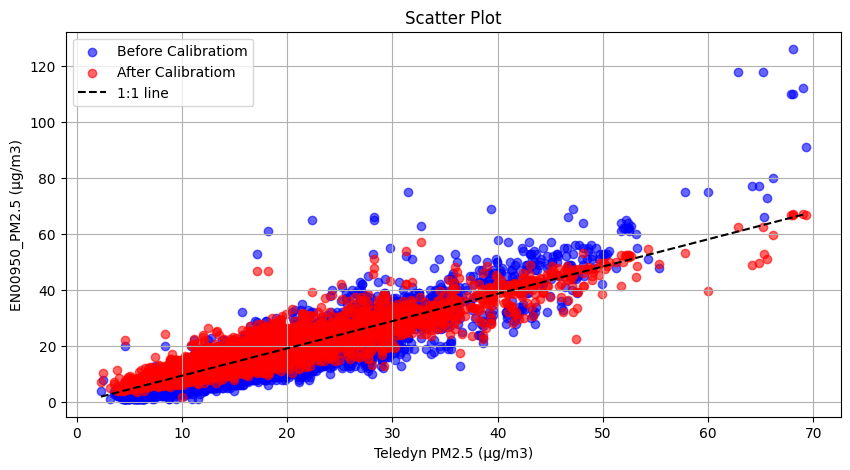

In [153]:
scatter_plot(combined_df, 'EN00950')

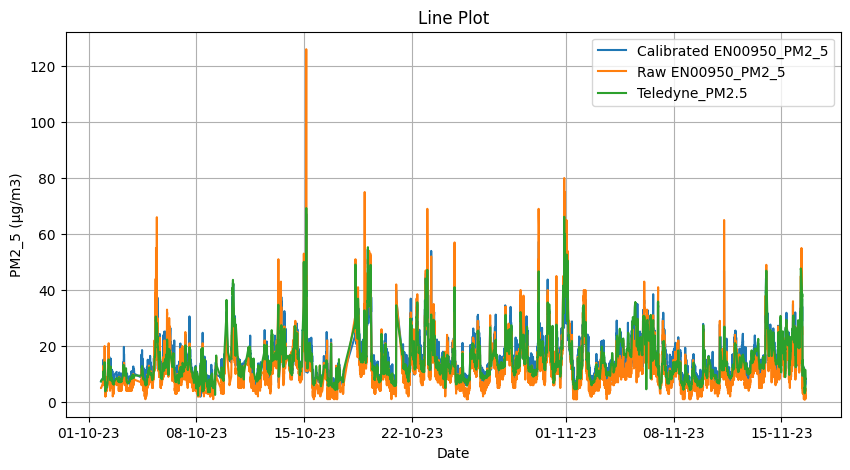

In [154]:
def plot_line_chart(df, sensor_id):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df['DataDate'], y=df['calibrated_PM2_5'], label=f'Calibrated {sensor_id}_PM2_5')
    sns.lineplot(x=df['DataDate'], y=df['PM2_5'], label=f'Raw {sensor_id}_PM2_5')
    sns.lineplot(x=df['DataDate'], y=df['PM2.5'], label='Teledyne_PM2.5')

    plt.title('Line Plot')
    plt.xlabel('Date')
    plt.ylabel('PM2_5 (μg/m3)')
    plt.grid(True)
    plt.legend()

    # Format the date on the x-axis to show hours and minutes (H:S)
    date_format = DateFormatter("%d-%m-%y")
    plt.gca().xaxis.set_major_formatter(date_format)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=0)
    
    
    # Save the graph as an image (e.g., PNG)
    plt.savefig('time_series_plot_for_calibration_with_random_forest_plots.png')

    # Display the plot
    plt.show()
plot_line_chart(combined_df, 'EN00950')